# <center>CITS5508 Lab sheet 3</center>

**Name:** Alastair Mory<br>
**Student number:** 21120848<br>
**Date created:** March 27th 2019<br>
**Last modified:** April 3rd 2019<br>

### Table of Contents



<a id='import_header'/></a>

In [68]:
from typing import Tuple

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import (
    ensemble,
    linear_model,
    metrics,
    model_selection,
    preprocessing,
    pipeline,
    svm
)

## Oxford Parkinson's Disease Detection Dataset

-----------------------------------------------------	

Data Set Characteristics: Multivariate<br>
Number of Instances: 197<br>
Attribute Characteristics: Real<br>
Number of Attributes: 23<br>
Associated Tasks: Classification<br>
Missing Values? N/A<br>

-----------------------------------------------------	
#### Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------
### Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.

-----------------------------------------------------
### Attribute Information:

**name** - ASCII subject name and recording number<br>
**MDVP:Fo(Hz)** - Average vocal fundamental frequency<br>
**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency<br>
**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency<br>
**MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP** - Several 
measures of variation in fundamental frequency<br>
**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude<br>
**NHR,HNR** - Two measures of ratio of noise to tonal components in the voice<br>
**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy<br>
**RPDE,D2** - Two nonlinear dynamical complexity measures<br>
**DFA** - Signal fractal scaling exponent<br>
**spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation<br>

-----------------------------------------------------
### Citations

'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 
IEEE Transactions on Biomedical Engineering 


In [69]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
data = pd.read_csv(data_url)

In [70]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [71]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


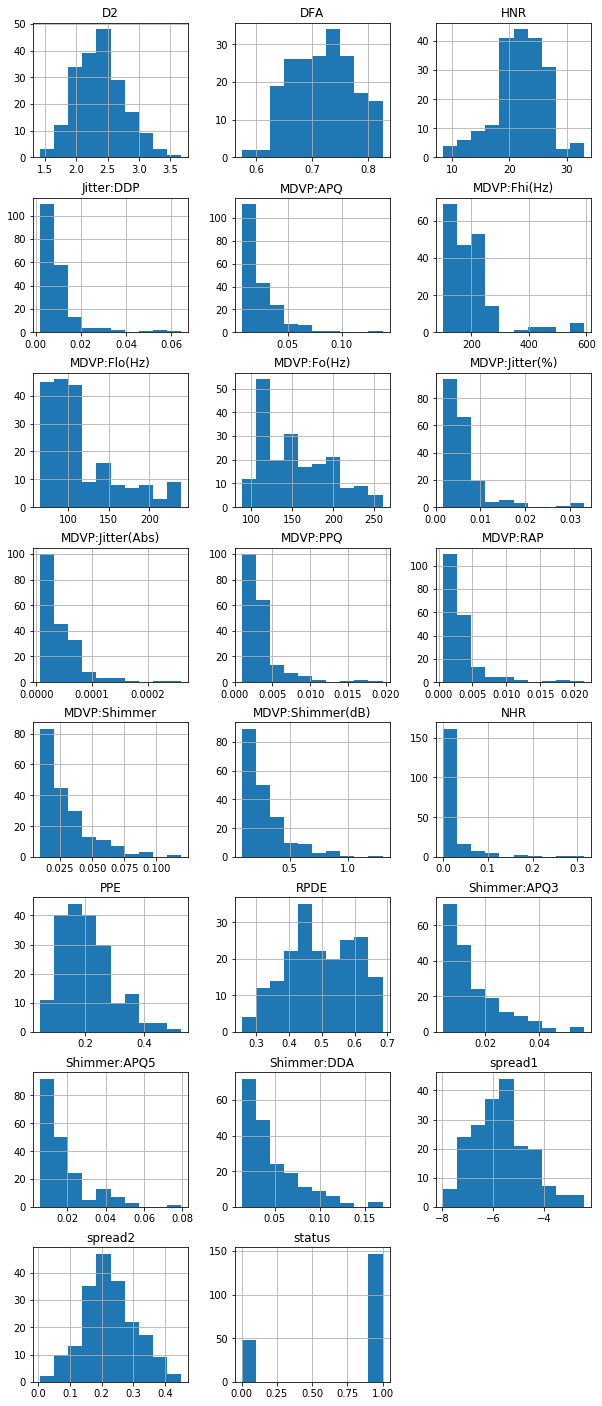

In [72]:
data.hist(layout=(8, 3), figsize=(10,25))
plt.show()

In [73]:
def data_clean() -> Tuple[pd.Series, pd.Series, pd.DataFrame, pd.DataFrame]:
    y = data['status']
    # Remove name (string value) & status (class label) from attributes.
    X = data.drop(columns=['name', 'status'])
    return sk.model_selection.train_test_split(y, X, test_size=0.2)


train_y, test_y, train_X, test_X = data_clean()

In [76]:
standard_scaler = sk.preprocessing.StandardScaler()

svm_clf = sk.pipeline.Pipeline(steps=[
    ('scale', standard_scaler),
    ('svc', sk.svm.SVC())
])

logit_clf = sk.pipeline.Pipeline(steps=[
    ('scale', standard_scaler),
    ('logit', sk.linear_model.LogisticRegression())
])

ensemble_clf = sk.ensemble.VotingClassifier(
    estimators=[('svc', svm_clf), ('logit', logit_clf)]
)


svm_pred = svm_clf.fit(train_X, train_y).predict(test_X)
logit_pred = logit_clf.fit(train_X, train_y).predict(test_X)
ensemble_pred = ensemble_clf.fit(train_X, train_y).predict(test_X)

print(f"SVM:      {sk.metrics.f1_score(test_y, svm_pred):.5}")
print(f"Logit:    {sk.metrics.f1_score(test_y, logit_pred):.5}")
print(f"Ensemble: {sk.metrics.f1_score(test_y, ensemble_pred):.5}")

SVM:      0.90323
Logit:    0.91525
Ensemble: 0.91525


/home/alastair/Documents/ml/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alastair/Documents/ml/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


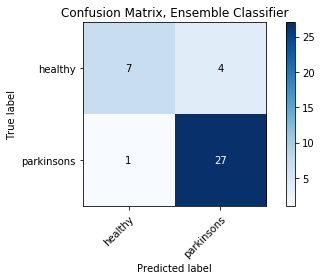

In [79]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          print_text=False,
                          cmap=plt.cm.Blues) -> mpl.axes.Axes:
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Copyright (c) 2007–2019 The scikit-learn developers.
    Used under license.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sk.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[sk.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if print_text:
        if normalize:
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
        print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


__disregard = plot_confusion_matrix(
    test_y, ensemble_pred, ['healthy', 'parkinsons'],
    title="Confusion Matrix, Ensemble Classifier")
plt.show()
